In [28]:
import pandas as pd
df = pd.read_csv("/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/Brave/final_fragments_summary.csv")
# change the category and only take the last element after the last ,
df['GeneName'] = df['Category'].apply(lambda x: x.split(',')[-1])

In [2]:
df.head()

,Group,Category,AAstart,AAend,Structure,Peptide,start,end,width,seqlength,...,RNAcount,Normalized_RNAcount,bitScore,BC_count,BC_adjusted_count,AAwidth,AAseqlength,AA_pos,AA_rel_pos,GeneName
0,DNA_AAVlib_DNAse_30cpc_1,"Adeno-associated virus,VP1,AAV1,,#125,AAV1-VP1",1,15,14aa,AADGYLPDWLEDNL,3,45,42,2208,...,251,1050.196354,79.800820,12,12602.356247,14,736,8,0.010870,AAV1-VP1
1,DNA_AAVlib_DNAse_30cpc_1,"Adeno-associated virus,VP1,AAV1,,#125,AAV1-VP1",2,16,14aa,ADGYLPDWLEDNLS,6,48,42,2208,...,50,209.202461,80.895238,3,627.607383,14,736,9,0.012228,AAV1-VP1
2,DNA_AAVlib_DNAse_30cpc_1,"Adeno-associated virus,VP1,AAV1,,#125,AAV1-VP1",3,17,14aa,DGYLPDWLEDNLSE,9,51,42,2208,...,48,200.834363,86.100000,5,1004.171813,14,736,10,0.013587,AAV1-VP1
3,DNA_AAVlib_DNAse_30cpc_1,"Adeno-associated virus,VP1,AAV1,,#125,AAV1-VP1",3,17,14aaA5,DGYLPDWLEDNLSE,9,51,42,2208,...,11,46.024541,106.733333,2,92.049083,14,736,10,0.013587,AAV1-VP1
4,DNA_AAVlib_DNAse_30cpc_1,"Adeno-associated virus,VP1,AAV1,,#125,AAV1-VP1",3,25,22aa,DGYLPDWLEDNLSEGIREWWDL,9,75,66,2208,...,53,221.754609,88.673529,3,665.263826,22,736,14,0.019022,AAV1-VP1


In [ ]:
df["Group"].unique()

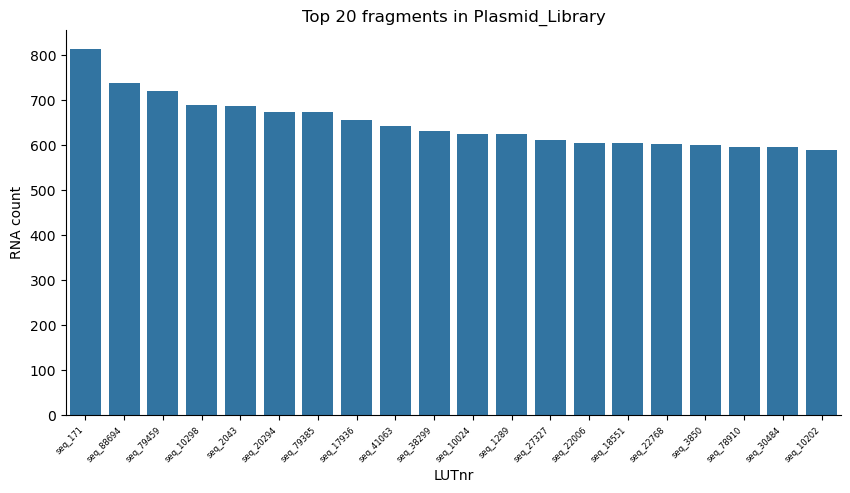

In [6]:
from plotting_functions import plot_top_counts
plot_top_counts(df, 20, 'Plasmid_Library', 'RNAcount', 'RNA count')

posx and posy should be finite values
posx and posy should be finite values


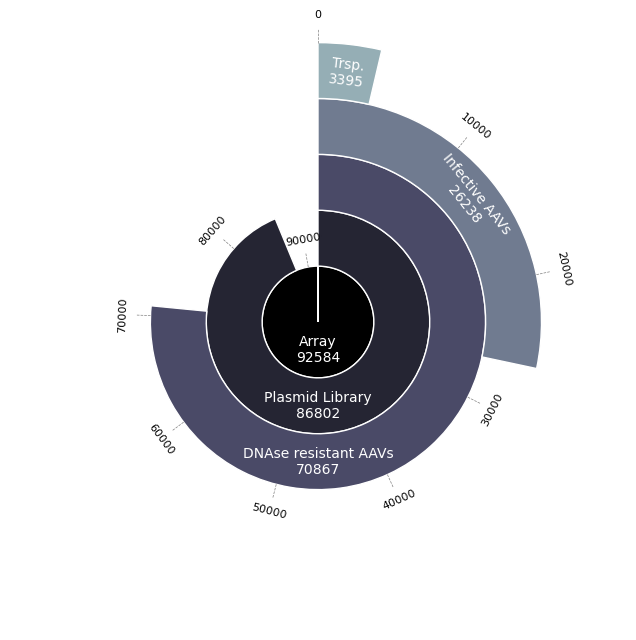

In [7]:
from plotting_functions import plot_quantities
plot_quantities(df,
                {'Plasmid_Library':'Plasmid Library', 'DNAse_resistant_AAVs':'DNAse resistant AAVs', 'Infective_AAVs': 'Infective AAVs', 'Transported_AAVs':'Trsp.'},
                {"Array": 92584})

In [8]:
# print all unique group names
print(df['Group'].unique())
# print all unqiue gene names
print(df['GeneName'].unique())

['DNA_AAVlib_DNAse_30cpc_1' 'DNA_AAVlib_DNAse_3cpc_1'
 'DNA_pscAAVlib_Prep2_1' 'DNAse_resistant_AAVs' 'Infective_AAVs'
 'Plasmid_Library' 'Transported_AAVs' 'mRNA_30cpc_4wks_Ctx_RatNr2_1'
 'mRNA_30cpc_4wks_SN_RatNr2_1' 'mRNA_30cpc_4wks_Str_RatNr2_1'
 'mRNA_30cpc_4wks_Th_RatNr2_1' 'mRNA_30cpc_Ctx_RatNr1_1'
 'mRNA_30cpc_Ctx_RatNr7_1' 'mRNA_30cpc_Ctx_RatNr8_1'
 'mRNA_30cpc_HEK293Nr3_1' 'mRNA_30cpc_SN_RatNr1_1'
 'mRNA_30cpc_SN_RatNr7_1' 'mRNA_30cpc_SN_RatNr8_1'
 'mRNA_30cpc_Str_RatNr1_1' 'mRNA_30cpc_Str_RatNr7_1'
 'mRNA_30cpc_Str_RatNr8_1' 'mRNA_30cpc_Th_RatNr1_1'
 'mRNA_30cpc_Th_RatNr7_1' 'mRNA_30cpc_Th_RatNr8_1'
 'mRNA_30cpc_pNeuronNr7_1' 'mRNA_3cpc_4wks_Ctx_RatNr13_1'
 'mRNA_3cpc_4wks_SN_RatNr13_1' 'mRNA_3cpc_4wks_Str_RatNr13_1'
 'mRNA_3cpc_4wks_Th_RatNr13_1' 'mRNA_3cpc_Ctx_RatNr15_1'
 'mRNA_3cpc_Ctx_RatNr19_1' 'mRNA_3cpc_Ctx_RatNr21_1'
 'mRNA_3cpc_HEK293Nr2_1' 'mRNA_3cpc_SN_RatNr15_1' 'mRNA_3cpc_SN_RatNr21_1'
 'mRNA_3cpc_Str_RatNr15_1' 'mRNA_3cpc_Str_RatNr19_1'
 'mRNA_3cpc_Str_RatNr20_

/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/Python_Scripts/Jupyter_notebooks/plotting_functions.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{abs(tick):.0f}' for tick in ax.get_yticks()])


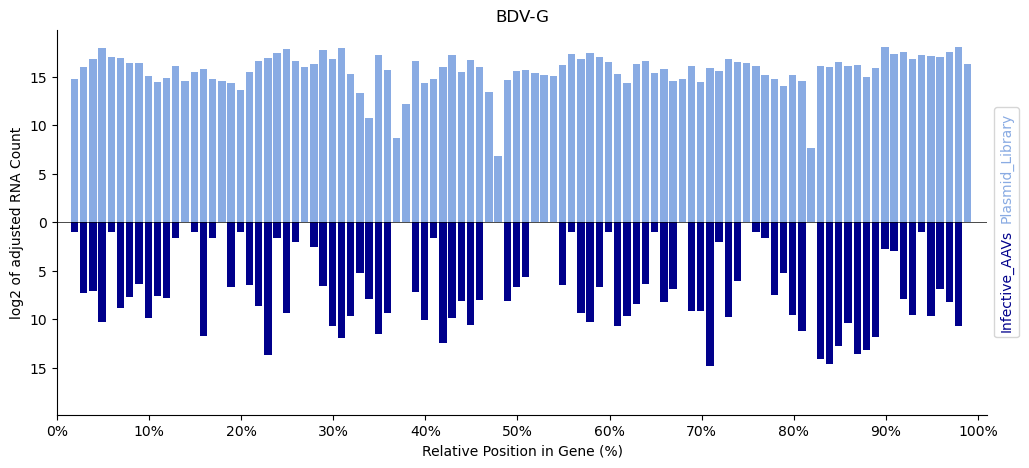

In [11]:
from plotting_functions import plot_rna_counts
plot_rna_counts(df, "Plasmid_Library", "Infective_AAVs", "BDV-G", "BC_adjusted_count", normalize=True)


In [12]:
def get_top_fragment(df, group, n, sort_by, strucutre):
    return df[(df['Group'] == group) & (df['Structure'] == strucutre)].nlargest(n, sort_by)

In [13]:
top_50_inf_aavs = get_top_fragment(df, "Infective_AAVs", 50, "Normalized_RNAcount", "14aa")
top_50_DNAse_res_aavs = get_top_fragment(df, "DNAse_resistant_AAVs", 50, "Normalized_RNAcount","14aa")
top_50_trans_aavs = get_top_fragment(df, "Transported_AAVs", 50, "Normalized_RNAcount","14aa")

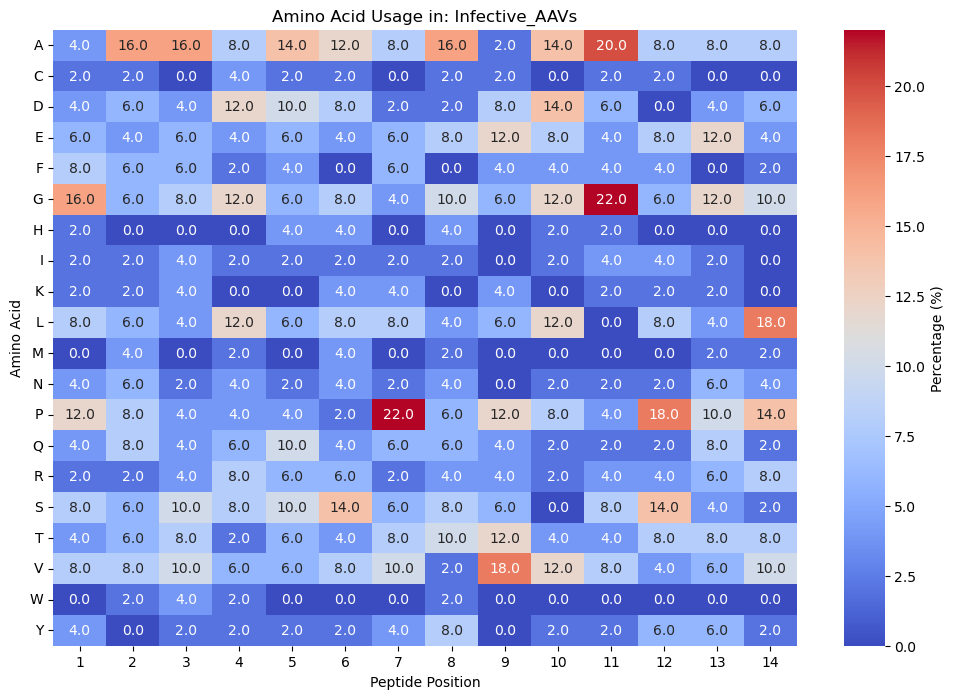

In [14]:
from plotting_functions import plot_amino_acid_heatmap
plot_amino_acid_heatmap(top_50_inf_aavs, "Infective_AAVs", "14aa")

In [15]:
import pandas as pd
import numpy as np
import logomaker
import matplotlib.pyplot as plt

def create_bit_information_logo(df: pd.DataFrame, structure: str):

    # Function to create bit information matrix
    def create_bit_information_matrix(peptides: list) -> pd.DataFrame:
        """
        Create a bit information matrix for peptides of the same length.
        
        Parameters
            peptides : list of str : A list of peptides of the same length.
            
        Returns
            pd.DataFrame : A DataFrame containing the bit information
        """
        # Validate that all peptides are the same length
        peptide_length = len(peptides[0])
        if not all(len(peptide) == peptide_length for peptide in peptides):
            raise ValueError("All peptides must be of the same length")

        # Create an empty frequency matrix
        amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
        freq_matrix = pd.DataFrame(0, index=amino_acids, columns=range(peptide_length))

        # Populate the frequency matrix
        for peptide in peptides:
            for i, amino_acid in enumerate(peptide):
                freq_matrix.loc[amino_acid, i] += 1

        # Normalize the matrix to get frequencies
        freq_matrix = freq_matrix.div(len(peptides))

        # Calculate Shannon entropy and bit information for each position
        bit_matrix = freq_matrix.copy()
        max_entropy = np.log2(len(amino_acids))  # log2(20)
        for col in freq_matrix.columns:
            # Shannon entropy
            entropy = -np.nansum(freq_matrix[col] * np.log2(freq_matrix[col].replace(0, np.nan)))
            # Information content
            ic = max_entropy - entropy
            # Scale frequencies by information content
            bit_matrix[col] = freq_matrix[col] * ic
            
        bit_matrix = bit_matrix.T

        return bit_matrix
    
    # Extract the peptides for the specified structure
    df = df[df["Structure"] == structure]
    
    # Compute the bit information matrix
    peptides = df["Peptide"].tolist()
    bit_matrix = create_bit_information_matrix(peptides)

    # Create a sequence logo using Logomaker
    logo = logomaker.Logo(bit_matrix,                         
                            color_scheme='chemistry',
                            vpad=.3,
                            width=.8)

    plt.ylabel("bits")
    plt.show()


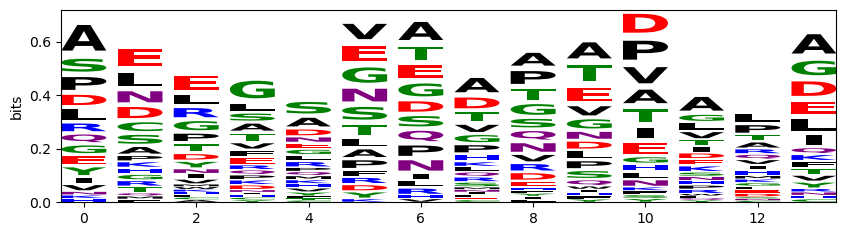

In [16]:
create_bit_information_logo(top_50_DNAse_res_aavs, "14aa")

In [ ]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import subprocess
    
def create_fasta_file(df: pd.DataFrame, filename: str):
    # Save sequences to FASTA
    fasta_records = [
        SeqRecord(Seq(seq), id=f"Seq{i+1}", description="") for i, seq in enumerate(df['Peptide'])
    ]
    with open(filename, "w") as fasta_file:
        SeqIO.write(fasta_records, fasta_file, "fasta")
        
create_fasta_file(top_50_inf_aavs, "peptides.fasta")

# Generate sequence logo
subprocess.run([
    "weblogo",
    "-f", "peptides.fasta",
    "-o", "peptide_logo.png",
    "-F", "png",
    "--title", "Peptide Consensus Logo",
    "--errorbars", "NO"
])


In [ ]:
import pandas as pd

example_df = top_50_inf_aavs
# Save sequences in FASTA format for alignment
with open("sequences.fasta", "w") as fasta_file:
    for i, peptide in enumerate(example_df["Peptide"], start=1):
        fasta_file.write(f">seq{i}\n{peptide}\n")


In [20]:
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import motifs

# Run ClustalOmega (assumes ClustalOmega is installed and in your PATH)
clustalo_cline = ClustalOmegaCommandline(infile="sequences.fasta", outfile="aligned.fasta", force=True, auto=True)
stdout, stderr = clustalo_cline()

# Parse the alignment
alignment = AlignIO.read("aligned.fasta", "fasta")

# Extract the aligned sequences as a list of Seq objects
aligned_seqs = [record.seq for record in alignment]

# Create a motif from these aligned sequences
motif = motifs.create(aligned_seqs)

# Examine the consensus motif
print("Consensus motif:", motif.consensus)
print("Position weight matrix:")
print(motif.pwm)


Consensus motif: AAAAAGATAAAAGAAGATAGATAAAAAAAGAGCCGAATGGAAATGAGAAATAAAAA
Position weight matrix:


ZeroDivisionError: float division by zero

In [ ]:
import pyhmmer
from pyhmmer.easel import SequenceFile
from pyhmmer.plan7 import Builder, Background, HMMFile, Pipeline
from pyhmmer.easel import MSAFile

# Load the alignment
with MSAFile("msa.fasta", digital=True) as msa_file:  # MSA in Stockholm format
    msa = msa_file.read()


builder = Builder(msa.alphabet)
background = Background(msa.alphabet)
hmm = builder.build_msa(msa, background)

with open("output_model.hmm", "wb") as f:
    hmm.write(f)

# Step 2: Search for Motifs in a Database
with HMMFile("output_model.hmm") as file:
    hmm = next(file)

with SequenceFile("target_database.fasta") as file:
    sequences = file.read_sequences(sequence_type="Protein")

pipeline = Pipeline(alphabet=hmm.alphabet)
hits = pipeline.search_hmm(hmm, sequences)

# Step 3: Save Significant Hits
with open("significant_hits.fasta", "w") as f:
    for hit in hits:
        if hit.evalue < 1e-5:  # Filter by E-value threshold
            f.write(f">{hit.name.decode()}\n{hit.sequence.decode()}\n")

print("Significant hits saved to 'significant_hits.fasta'.")


In [ ]:
import pyhmmer

# Load sequences from the FASTA file
sequences = []
with pyhmmer.easel.SequenceFile("msa.fasta") as sequence_file:
    for sequence in sequence_file:
        sequences.append(sequence)

# Create an MSA from the sequences
msa = pyhmmer.easel.TextMSA(name=b"msa", sequences=sequences)
alphabet = pyhmmer.easel.Alphabet.amino()
msa = msa.digitize(alphabet)
builder = pyhmmer.plan7.Builder(alphabet)
background = pyhmmer.plan7.Background(alphabet)
hmm, _, _ = builder.build_msa(msa, background)

hmm.consensus

In [ ]:
# Build an HMM profile from the alignment
hmm = pyhmmer.plan7.Builder().build(msa)

# Optionally save the HMM to a file
with open("model.hmm", "wb") as hmm_file:
    hmm.write(hmm_file)


In [ ]:
import numpy as np

# Extract amino acid probabilities for each position
alphabet = pyhmmer.easel.Alphabet.amino()  # Amino acid alphabet
probabilities = []

for position in hmm.match_states:
    probabilities.append(position.match_emissions)

# Convert to a DataFrame for easy handling
amino_acids = [alphabet.symbol(i) for i in range(alphabet.size)]
position_frequencies = pd.DataFrame(np.array(probabilities), columns=amino_acids)


In [ ]:
import logomaker
import matplotlib.pyplot as plt

# Normalize frequencies (optional, logomaker accepts normalized frequencies)
position_frequencies_normalized = position_frequencies.div(position_frequencies.sum(axis=1), axis=0)

# Create the logo
logo = logomaker.Logo(position_frequencies_normalized, shade_below=.5, color_scheme='classic')

# Customize the plot
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=90, fmt='%d')

plt.title("Sequence Logo of Peptides")
plt.xlabel("Position in Peptide")
plt.ylabel("Probability")
plt.show()
